## EXPLORE

### MAIN STEPS

Basic exploration can be done before splitting.  

**HYPOTHESISE**
- This is done after splitting.  
- Ask questions of the data. For example, does higher hp equal less mpg ?



**VISUALISE**
- Plot the distribution of each feature. Check for normal distribution. This can be done BEFORE splitting the data. 
- Plot the interaction of two or more variables. Can only be done AFTER splitting the data.
- See how specific groups compare to others or overall populations (e.g, T-tests : sport car mpg cf overall population mpg).
- Document takeaways.
- Check for collinearity between features. Carry on with the feature that has the strongest relationship to the target variable.


**TEST HYPOTHESIS**
- If the graph is very, very clear, document takeaways and move on.
- If graph is not so clear, perform statistical tests to ascertain assumptions.


In [81]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from regprepare import get_auto_mpg, train_val_test

from scipy.stats import pearsonr, spearmanr

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   displ       392 non-null    float64
 3   horsepower  392 non-null    float64
 4   weight      392 non-null    float64
 5   acc         392 non-null    float64
 6   model_year  392 non-null    int64  
 7   origin      392 non-null    int64  
 8   name        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


### Preparing to do univariate distributions.  
We will not be using 'name'.  
Will all the other columns be continuous ?  -What does 'origin' mean ? -Is 'model_year' continuous ? -Cylinders ?

In [4]:
# make a list of continuous variables

con_var = ['mpg', 'displ', 'horsepower', 'weight', 'acc']

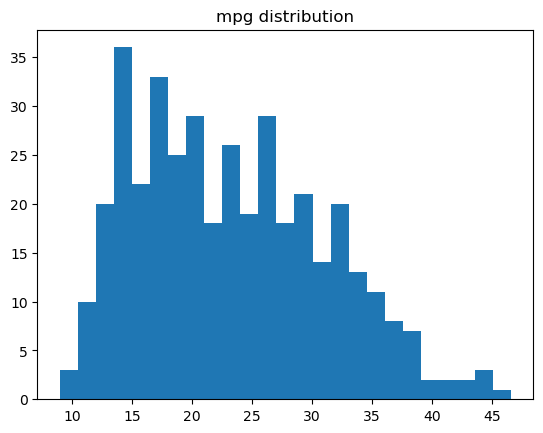

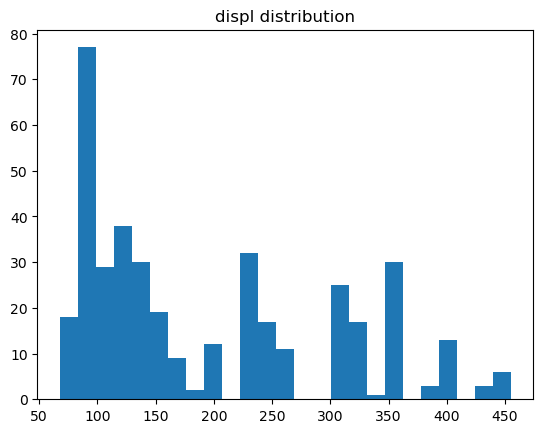

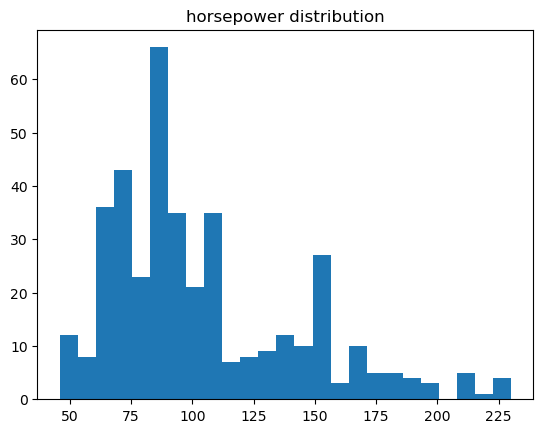

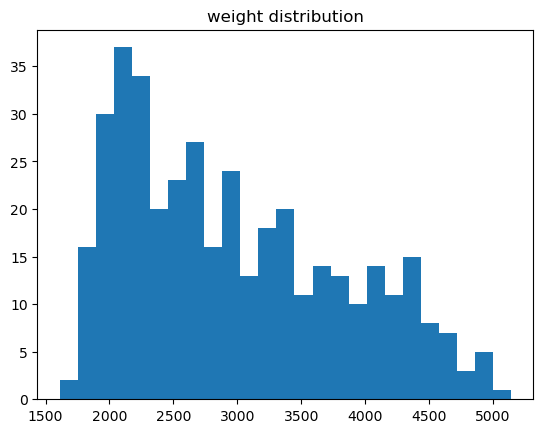

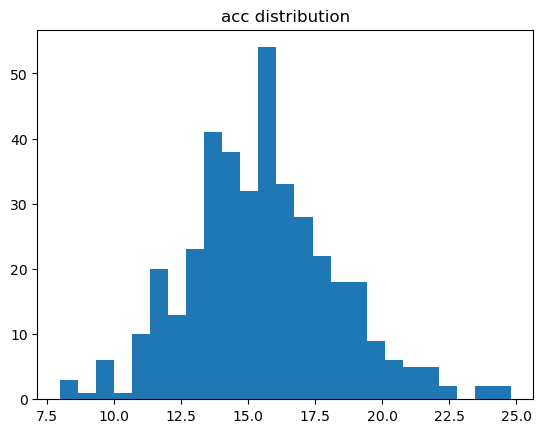

In [9]:
for col in con_var:
    
    plt.hist(df[col], bins = 25) # 'plot of df columns
    plt.title(f'{col} distribution')
    plt.show()
    
# plotting the split data

Acceleration and mpg are the most normally distributed of the columns.  
Displacement, weight and hp are _not_ normally distributed.



In [11]:
# name of vehicles, to determine if advisable to plot
df['name'].nunique()

# 301 unique car names : not advisable to plot

301

In [14]:
## checking how many options in other categories

df['model_year'].nunique(), df['origin'].nunique()

(13, 3)

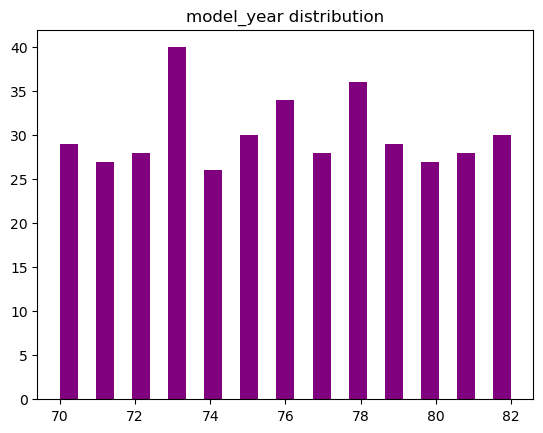

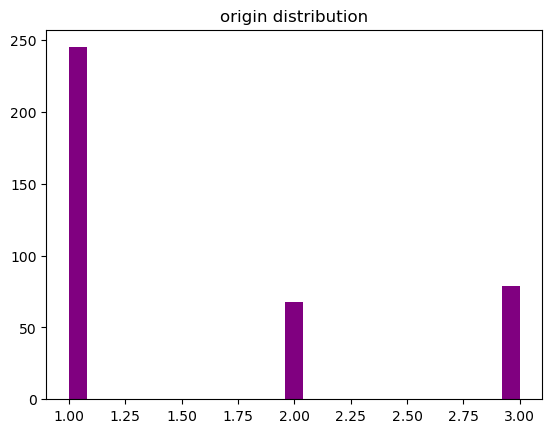

In [17]:

#plotting discrete columns

for col in ['model_year', 'origin']:
    
    plt.hist(df[col], bins = 25, color = ['purple'])
    plt.title(f'{col} distribution')
    plt.show()

For the discrete column of **'model_year'**, distribution is relatively uniform from 1970 to 1982.  

For the discrete column **'origin'**, distribution is skewed, with significantly more cars at origin '1'.

**Going foward, we will prefer the Spearman R test, because much of the data is NOT normally distributed.**

## BIVARIATE DISTRIBUTION

**CONTINUOUS WITH CONTINUOUS**

- sns.pairplot
- sns.relplot
- sns.lmplot
- sns.joinplot
- sns.heatmap

In [44]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

In [45]:
# looking at the continuous variables

train[con_var].head()

,mpg,displ,horsepower,weight,acc
212,16.5,350.0,180.0,4380.0,12.1
346,32.3,97.0,67.0,2065.0,17.8
325,44.3,90.0,48.0,2085.0,21.7
90,12.0,429.0,198.0,4952.0,11.5
246,32.8,78.0,52.0,1985.0,19.4


In [90]:
# the .corr will by default use Pearson's R (normally distributed data)
# this computes pairwise correlation of columns

train_corr = train[con_var].corr(method = 'spearman')
train_corr

# to chage for data that is not normally distributed, mustindicate a method in the .corr()
# method needs to be entered a string

,mpg,displ,horsepower,weight,acc
mpg,1.000000,-0.861611,-0.876454,-0.885822,0.486695
displ,-0.861611,1.000000,0.881665,0.940957,-0.531173
horsepower,-0.876454,0.881665,1.000000,0.877448,-0.687201
weight,-0.885822,0.940957,0.877448,1.000000,-0.417474
acc,0.486695,-0.531173,-0.687201,-0.417474,1.000000


**Using a heatmap will make this DF more digestible.**

<AxesSubplot:>

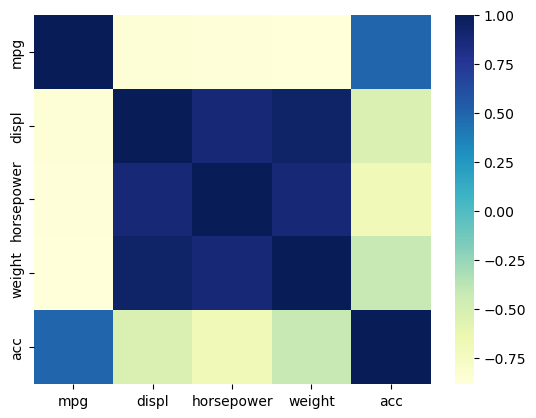

In [91]:
# make a heatmap of con_corr

sns.heatmap(train_corr, cmap = 'YlGnBu')

TAKEAWAYS  

- **Displacement, hp, weight all show a strong negative correlation with mpg.**  
- **Acceleration and mpg have a moderate positive correlation.**    
- **Displacement, hp, weight all have a strong positive correlation amongst themselves.**  
- **There is a moderate negative correlation between acceleration and (displacement, hp, weight).**  

It would be important to compare the spearmanr results between (displacement, hp, weight) and mpg to see which feature has the best (highest r-squared value and lowest p-value) correlation with the target variable (mpg).

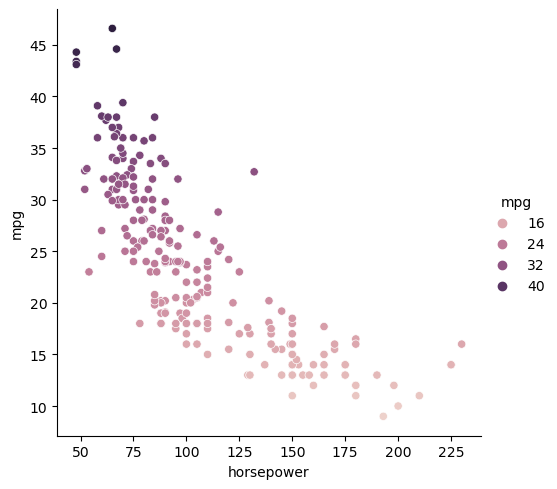

In [92]:
## looking at relationship between two variables

sns.relplot(x = 'horsepower', y = 'mpg', data = train, hue = 'mpg')

# it's linear, but not all that linear

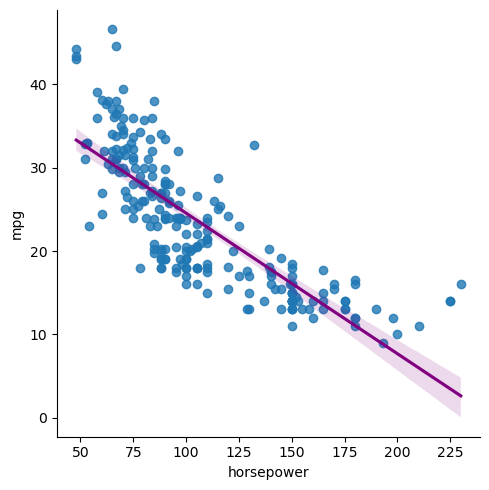

In [62]:
# lmplot has the correlation line

sns.lmplot(x = 'horsepower', y = 'mpg', data = train, line_kws={'color': 'purple'})

TAKEAWAY

**There is a strong negative correlation between hp and mpg, but it is not linear.**

### DISCRETE WITH CONTINUOUS

- sns.swarmplot
- sns.stripplot
- sns.boxplot
- sns.violinplot
- sns.barplot

X is discrete, y is continuous (mpg).

<AxesSubplot:xlabel='origin', ylabel='mpg'>

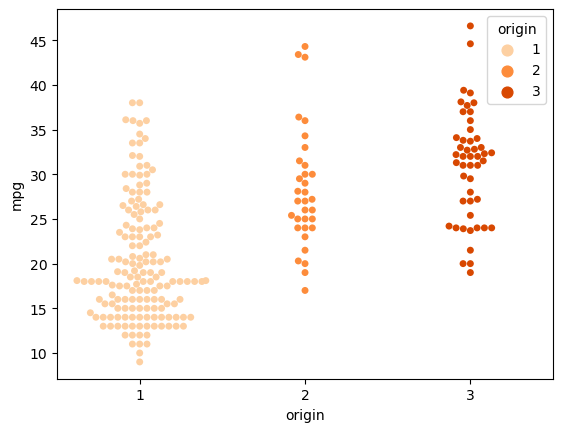

In [77]:
# this looks ok because only 3 x-values

sns.swarmplot(x = 'origin', y = 'mpg', data = train, hue = 'origin', palette = 'Oranges')

Option for tests :  
   - One-sample t-test to compare origin 1 to overall mpg. (Further... One-tailed : Are origin 1 make cars with _less mpg_ than the overall avg in dataset ?)
   - Independent T-test : origin 1 mpg to origins 2 & 3.
   - 

**HYPOTHESES**

H_0 : Mpg for Origin 1 cars is greater than or equal to the overall average mpg.  
    
H_a : Mpg for Origin 1 cars is less than the overall average mpg.  

In [86]:
# doing some statistical tests : T-test one-sample, ONE-TAILED

t, p = stats.ttest_1samp(train[train['origin'] == 1]['mpg'], train['mpg'].mean())

# this is subset of dataframe interested in comparing to overall population

In [87]:
t, p
# looking at the results


(-6.187826120031006, 5.335898074820472e-09)

In [88]:
## check / test of what t and p indicate

alpha = 0.05

if t < 0 and p/2 < alpha:
    print('Reject the null hypothesis.')
    
    # p/2 because looking at 1 single tail
    # a negative t result indicates that sample population is below the overall population.
    # (t is the number of std deviations as seen through magnitude that the sample 
       # falls below (-) or above the mean.)
    # t's number indicates the magnitude of the difference
    # hence, we reject the null hypothes.

else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


**The test rejected the null hypothesis. Origin 1 cars have a significantly less mpg than the overall average.**

### DISCRETE WITH DISCRETE

- pd.crosstab, passed into sns.heatmap